## Reads the summary file and makes some summary statistics

In [1]:
# Dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk
from scipy.stats import t, ks_2samp

In [2]:
# Set paths
rootPathH = '/Users/frederictheunissen/Code/songephys/'
dataPathH = 'data/birds/'

rootPathJ = '//Users/frederictheunissen/Google Drive/My Drive/julie/'
dataPathJ = 'pkl/'


In [3]:
# Read data files 
inPathH = rootPathH+dataPathH+'summarySel.pkl'
fileInH = open(inPathH,"rb")
dfSummaryH = pk.load(fileInH)
fileInH.close()

inPathJ = rootPathJ+dataPathJ+'summarySelJulie.pkl'
fileInJ = open(inPathJ,"rb")
dfSummaryJ = pk.load(fileInJ)
fileInJ.close()

In [4]:
# Number of auditory units

nCellsH = dfSummaryH.shape[0]
nAudH = sum(dfSummaryH['pAud']< 0.01)

nInhH = sum((dfSummaryH['pAud']< 0.01) & (dfSummaryH['zAud']< 0.0))

print("Awake behaving data set:")
print(nAudH,'/',nCellsH, '(', nAudH*100.0/nCellsH, ') auditory units')
print(nInhH,'/',nAudH, '(', nInhH*100.0/nAudH, ') are inhibited by sound')

nCellsJ = dfSummaryJ.shape[0]
nAudJ = sum(dfSummaryJ['pAud']< 0.01)

nInhJ = sum((dfSummaryJ['pAud']< 0.01) & (dfSummaryJ['zAud']< 0.0))

print("Urethane anesthetized data set:")
print(nAudJ,'/',nCellsJ, '(', nAudJ*100.0/nCellsJ, ') auditory units')
print(nInhJ,'/',nAudJ, '(', nInhJ*100.0/nAudJ, ') are inhibited by sound')

# Repeat with single Units by SNR > 5

nAudSUH = sum((dfSummaryH['pAud']< 0.01) & (dfSummaryH['snr'] >= 5.0))

nInhSUH = sum((dfSummaryH['pAud']< 0.01) & (dfSummaryH['zAud']< 0.0) & (dfSummaryH['snr'] >= 5.0))

print("Awake behaving data set Single Units:")
print(nAudSUH,'/',nCellsH, '(', nAudSUH*100.0/nCellsH, ') auditory single units')
print(nInhSUH,'/',nAudSUH, '(', nInhSUH*100.0/nAudSUH, ') are inhibited by sound')


nAudSUJ = sum( (dfSummaryJ['pAud']< 0.01) & (dfSummaryJ['snr'] >= 5.0))

nInhSUJ = sum((dfSummaryJ['pAud']< 0.01) & (dfSummaryJ['zAud']< 0.0) & (dfSummaryJ['snr'] >= 5.0))

print("Urethane anesthetized data set:")
print(nAudSUJ,'/',nCellsJ, '(', nAudSUJ*100.0/nCellsJ, ') auditory single units')
print(nInhSUJ,'/',nAudSUJ, '(', nInhSUJ*100.0/nAudSUJ, ') are inhibited by sound')


Awake behaving data set:
439 / 732 ( 59.97267759562842 ) auditory units
62 / 439 ( 14.123006833712983 ) are inhibited by sound
Urethane anesthetized data set:
1032 / 1207 ( 85.50124275062137 ) auditory units
15 / 1032 ( 1.4534883720930232 ) are inhibited by sound
Awake behaving data set Single Units:
292 / 732 ( 39.89071038251366 ) auditory single units
46 / 292 ( 15.753424657534246 ) are inhibited by sound
Urethane anesthetized data set:
609 / 1207 ( 50.45567522783762 ) auditory single units
13 / 609 ( 2.134646962233169 ) are inhibited by sound


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


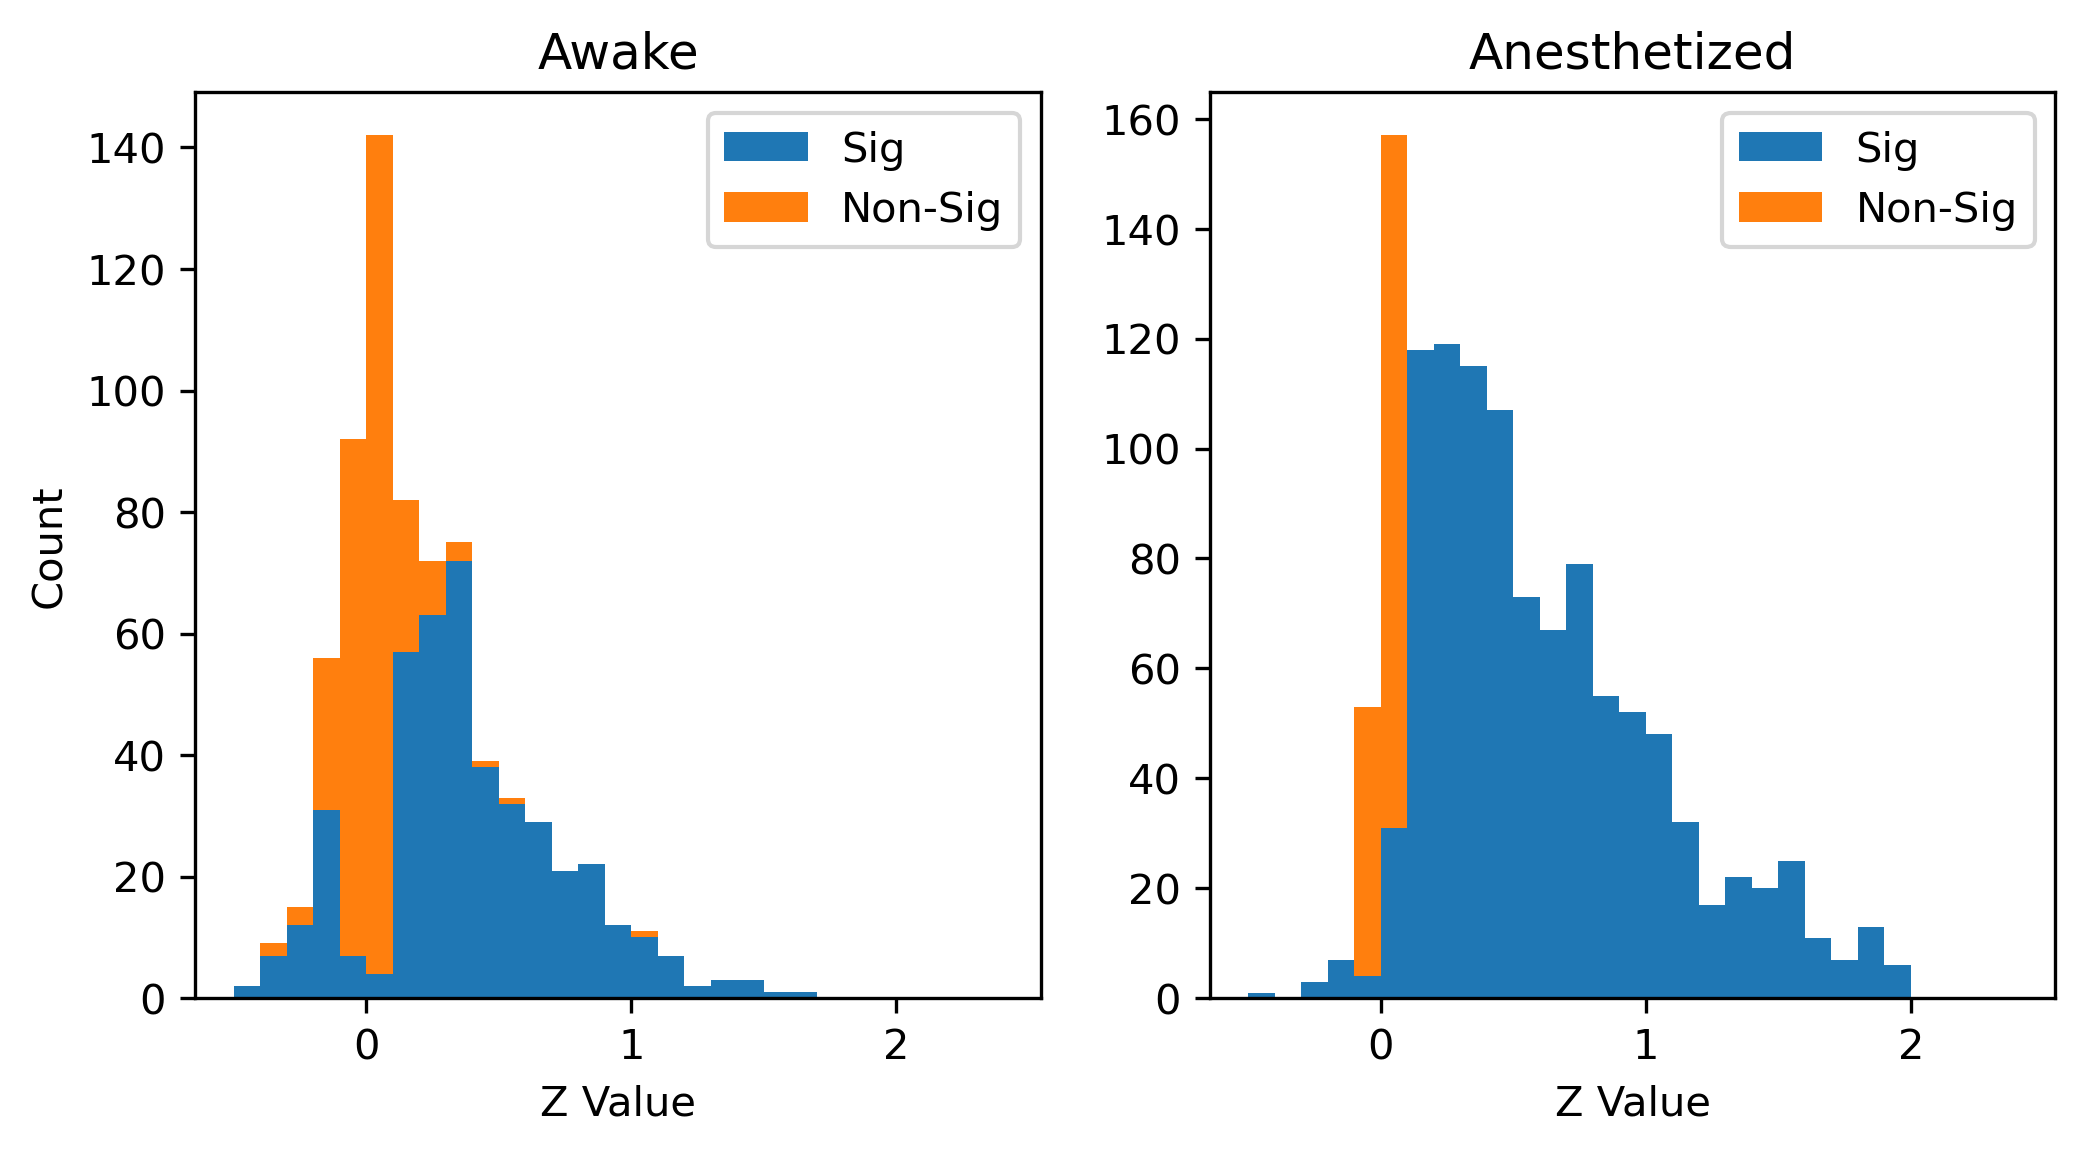

In [5]:
# Histogram of zvalues
fig = plt.figure(figsize=(8,4), dpi=300)
ax = fig.subplots(1,2)


ax[0].hist([dfSummaryH['zAud'][dfSummaryH['pAud']<0.01], dfSummaryH['zAud'][dfSummaryH['pAud']>=0.01]], 
         np.arange(-0.5, 2.5 , 0.1), stacked=True )
ax[0].set_xlabel('Z Value')
ax[0].set_ylabel('Count')
ax[0].legend(['Sig', 'Non-Sig'])
ax[0].set_title('Awake')


ax[1].hist([dfSummaryJ['zAud'][dfSummaryJ['pAud']<0.01], dfSummaryJ['zAud'][dfSummaryJ['pAud']>=0.01]], 
         np.arange(-0.5, 2.5 , 0.1), stacked=True )
ax[1].set_xlabel('Z Value')
# plt.ylabel('Count')
ax[1].legend(['Sig', 'Non-Sig'])
ax[1].set_title('Anesthetized')

plt.savefig('/Users/frederictheunissen/Desktop/zhist.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


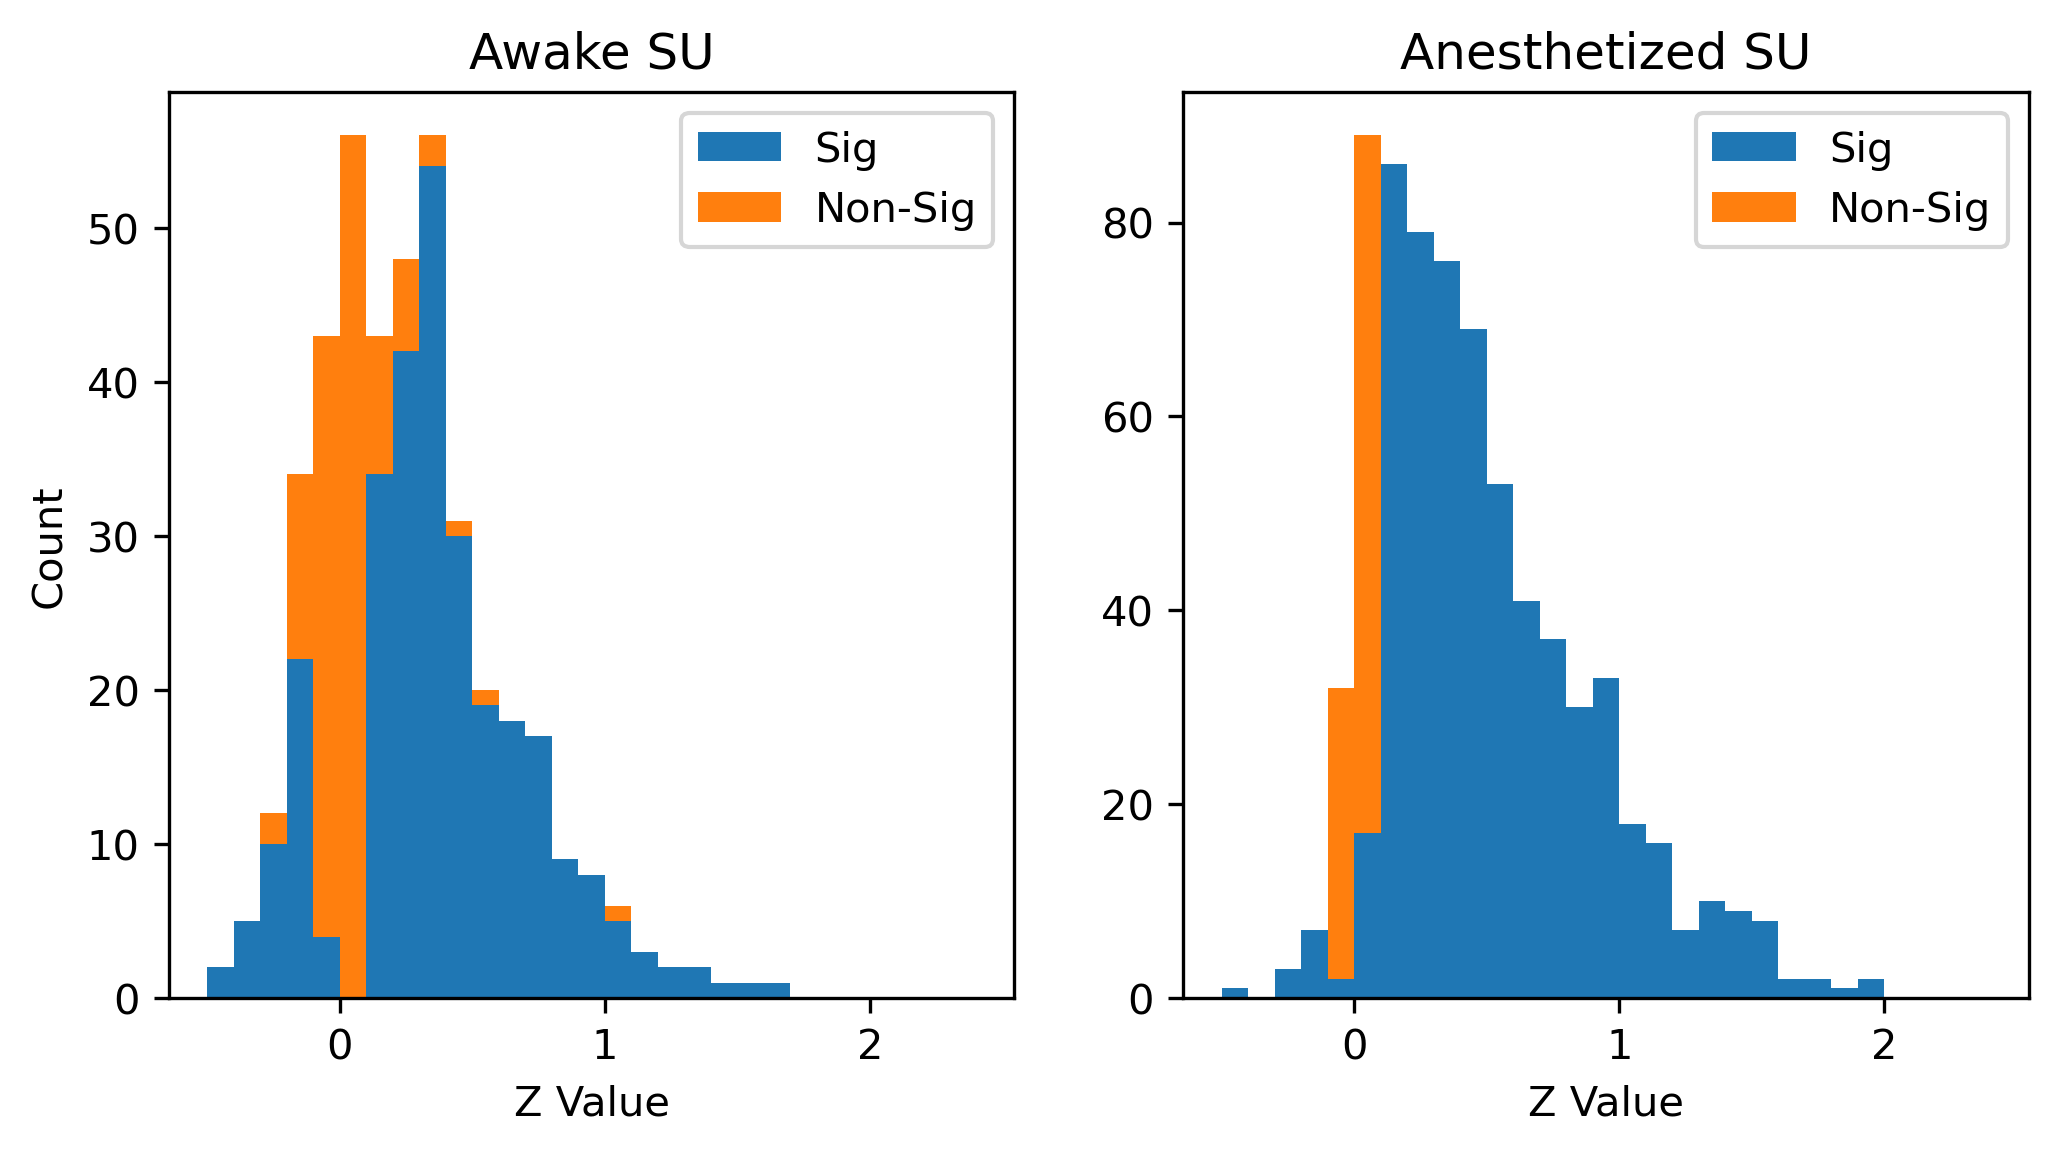

In [6]:
# Histogram of zvalues
fig = plt.figure(figsize=(8,4), dpi=300)
ax = fig.subplots(1,2)

ax[0].hist([dfSummaryH['zAud'][(dfSummaryH['pAud']<0.01) & (dfSummaryH['snr']>= 5.0)], dfSummaryH['zAud'][(dfSummaryH['pAud']>=0.01)  & (dfSummaryH['snr']>= 5.0)]], 
         np.arange(-0.5, 2.5 , 0.1), stacked=True )
ax[0].set_xlabel('Z Value')
ax[0].set_ylabel('Count')
ax[0].legend(['Sig', 'Non-Sig'])
ax[0].set_title('Awake SU')


ax[1].hist([dfSummaryJ['zAud'][(dfSummaryJ['pAud']<0.01) & (dfSummaryJ['snr']>= 5.0)], dfSummaryJ['zAud'][(dfSummaryJ['pAud']>=0.01) & (dfSummaryJ['snr']>= 5.0)]], 
         np.arange(-0.5, 2.5 , 0.1), stacked=True )
ax[1].set_xlabel('Z Value')
# plt.ylabel('Count')
ax[1].legend(['Sig', 'Non-Sig'])
ax[1].set_title('Anesthetized SU')

plt.savefig('/Users/frederictheunissen/Desktop/zhistSU.eps')

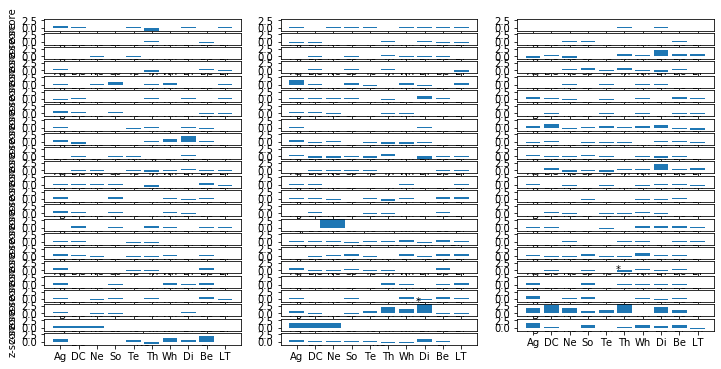

In [8]:
nAudUnits = 0
for index, row in dfSummaryH.iterrows():
    if ( (row['selInd'] > 0.75) & (row['pAud']<0.01) ):
        nAudUnits += 1

nrow = int(nAudUnits/3)
if (nAudUnits % 3 != 0):
    nrow += 1

plt.figure(figsize=(12.0, 6.0))

iplot = 0
for index, row in dfSummaryH.iterrows():
    # Responses across calls for auditory units
    if ((row['selInd'] > 0.75) & (row['pAud']<0.01)) :
        iplot += 1
        plt.subplot(nrow, 3, iplot)
        plt.bar(range(len(row['zcall'])), height = row['zcall'], tick_label = row['calls'])
        plt.ylim([-1, 3])
        if (iplot%3 == 1):
            plt.ylabel('z-score')

        # Add a significance star
        for i in range(len(row['zcall'])):
            if row['pcall'][i] < 0.05:
                plt.text(i-0.5, row['zcall'][i]/2, '*')
                
plt.savefig('/Users/frederictheunissen/Desktop/ratePlotH.png')

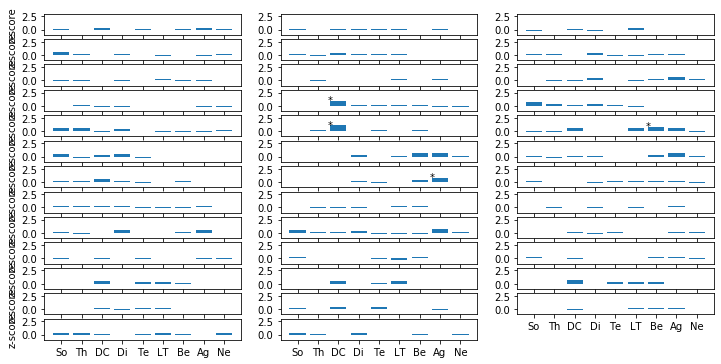

In [9]:
nAudUnits = 0
for index, row in dfSummaryJ.iterrows():
    if ( (row['selInd'] > 0.75) & (row['pAud']<0.01) ):
        nAudUnits += 1

nrow = int(nAudUnits/3)
if (nAudUnits % 3 != 0):
    nrow += 1

plt.figure(figsize=(12.0, 6.0))

iplot = 0
for index, row in dfSummaryJ.iterrows():
    # Responses across calls for auditory units
    if ((row['selInd'] > 0.75) & (row['pAud']<0.01)) :
        iplot += 1
        plt.subplot(nrow, 3, iplot)
        plt.bar(range(len(row['zcall'])), height = row['zcall'], tick_label = row['calls'])
        plt.ylim([-1, 3])
        if (iplot%3 == 1):
            plt.ylabel('z-score')

        # Add a significance star
        for i in range(len(row['zcall'])):
            if row['pcall'][i] < 0.05:
                plt.text(i-0.5, row['zcall'][i]/2, '*')
                
plt.savefig('/Users/frederictheunissen/Desktop/ratePlotJ.png')

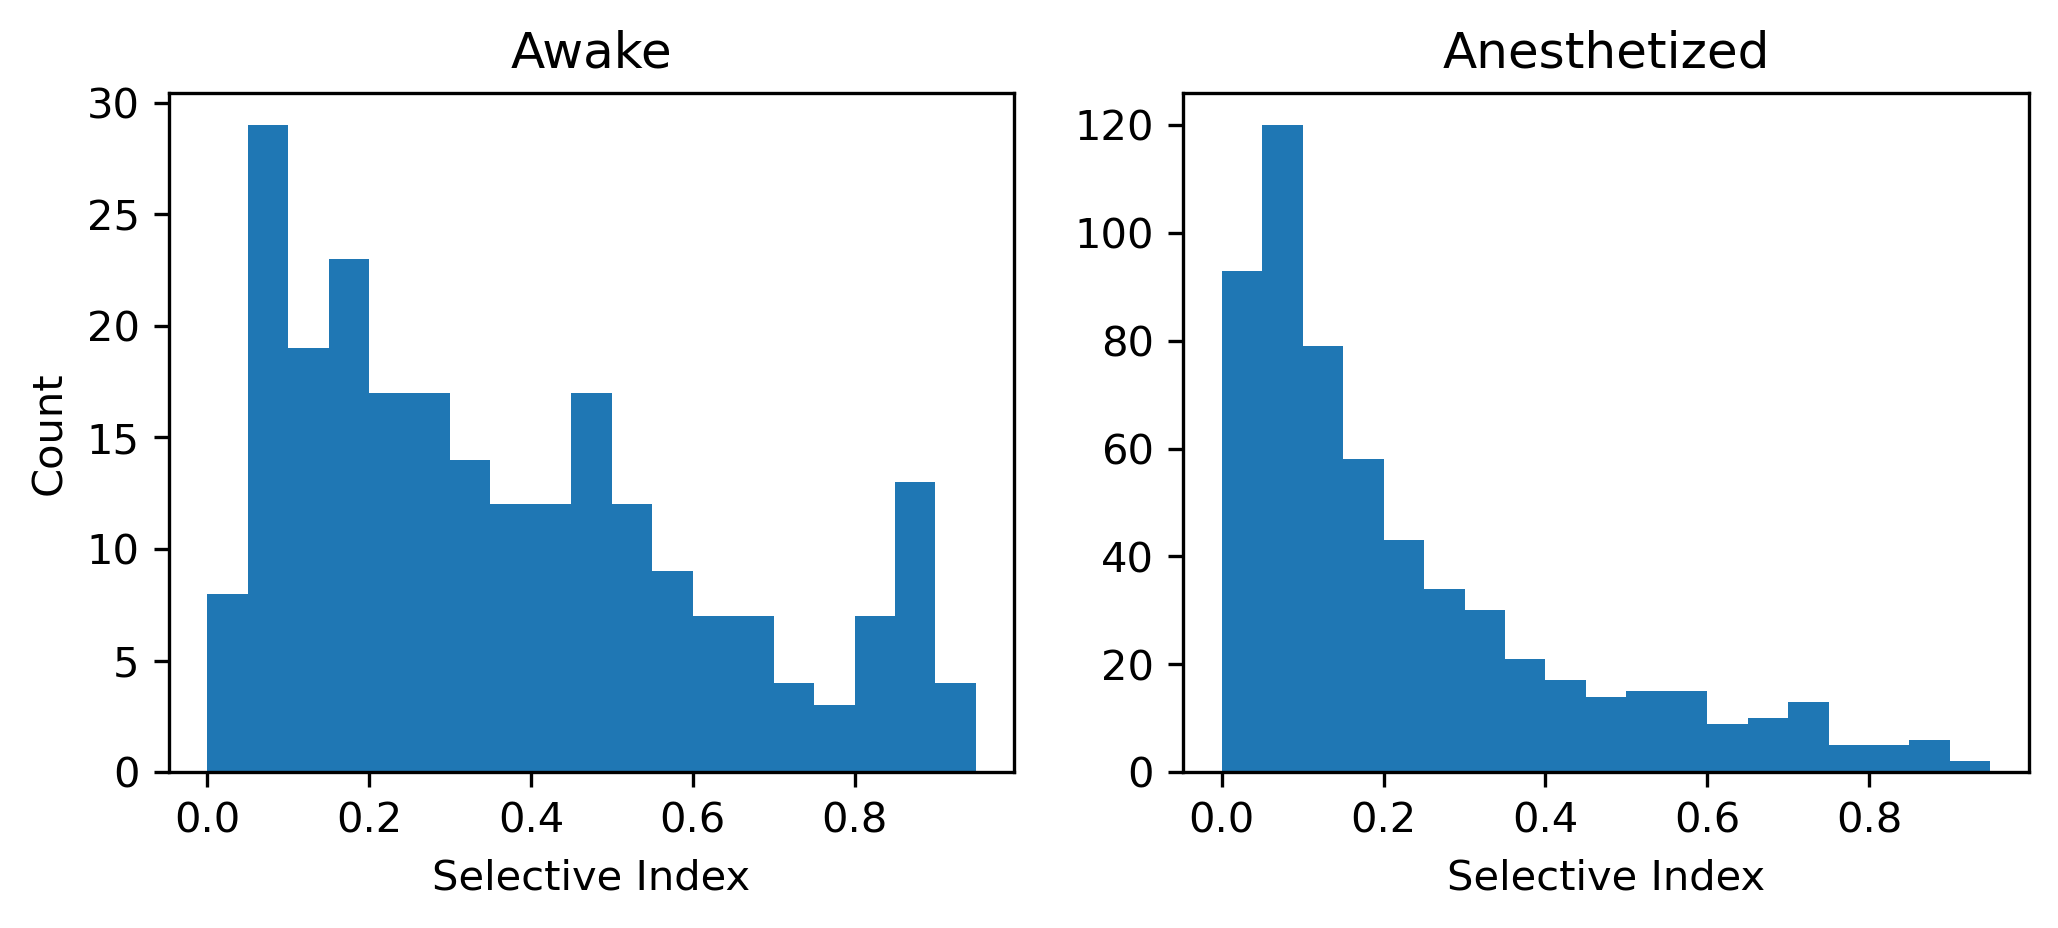

In [7]:
# Histogram of selInd
fig = plt.figure(figsize=(8,3), dpi=300)
dataH = dfSummaryH['selInd'][(dfSummaryH['pAud']<0.01) & (dfSummaryH['zAud'] >=0.0) & (dfSummaryH['snr'] >=5.0)]
dataJ = dfSummaryJ['selInd'][(dfSummaryJ['pAud']<0.01) & (dfSummaryJ['zAud'] >=0.0) & (dfSummaryJ['snr'] >=5.0)]

ax = fig.subplots(1,2)
ax[0].hist(dataH,np.arange(0.0, 1.0 , 0.05))
ax[0].set_xlabel('Selective Index')
ax[0].set_ylabel('Count')
ax[0].set_title('Awake')

ax[1].hist(dataJ, np.arange(0.0, 1.0 , 0.05))
ax[1].set_xlabel('Selective Index')
ax[1].set_title('Anesthetized')
#plt.ylabel('Count')

plt.savefig('/Users/frederictheunissen/Desktop/SelIndhist.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


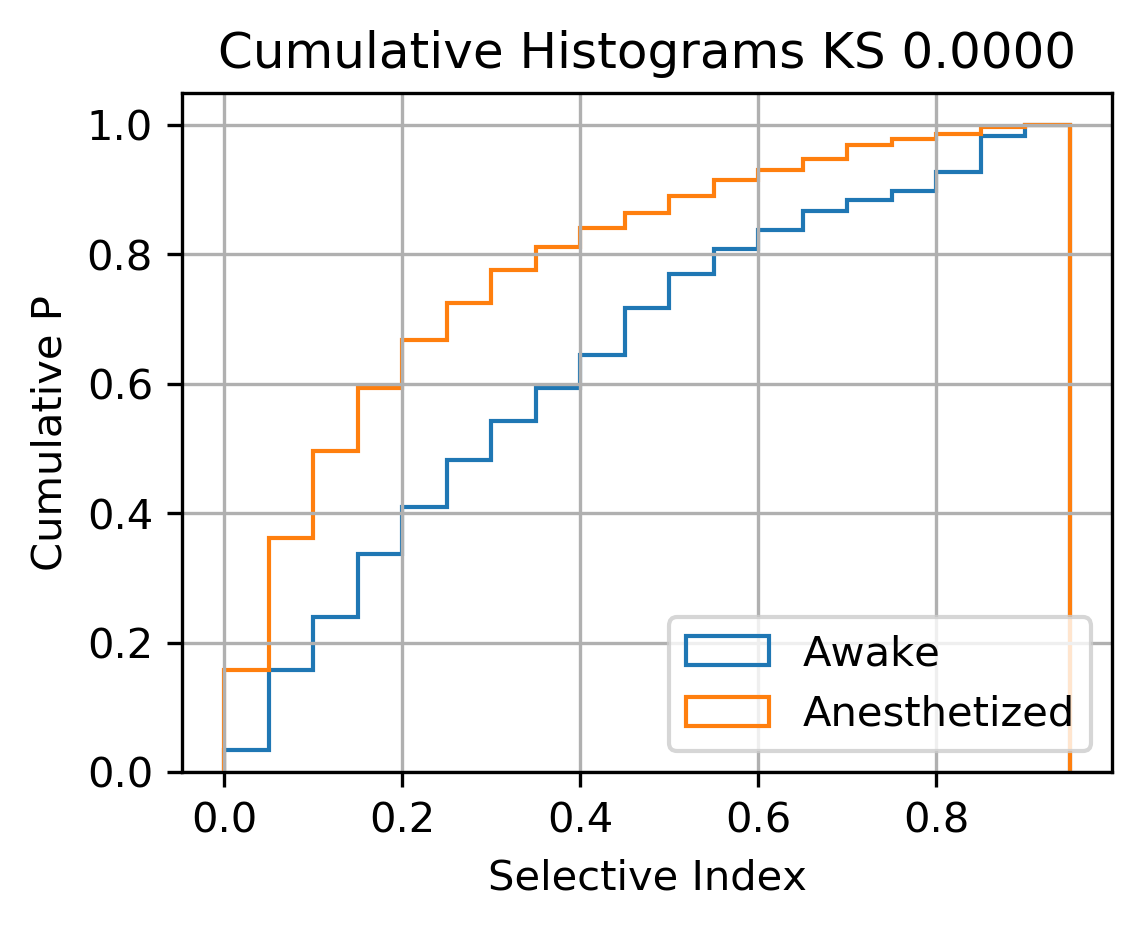

In [64]:
# Cumulative histogram 

fig, ax = plt.subplots(figsize=(4, 3), dpi =300)

# plot the cumulative histogram
n, bins, patches = ax.hist(dataH, np.arange(0.0, 1.0 , 0.05), density=True, histtype='step',
                           cumulative=True, label='Awake')

n, bins, patches = ax.hist(dataJ, np.arange(0.0, 1.0 , 0.05), density=True, histtype='step',
                            cumulative=True, label='Anesthetized')

k, pval = ks_2samp(dataH, dataJ, alternative='two-sided', mode='auto')

ax.grid(True)
ax.legend(loc='lower right')
ax.set_title('Cumulative Histograms KS %.4f' % pval)
ax.set_xlabel('Selective Index')
ax.set_ylabel('Cumulative P')

plt.savefig('/Users/frederictheunissen/Desktop/SelIndCumhist.eps')

In [8]:
# Generate a new matrix of responses sorted by z-score
CallAxis = ['Te', 'DC', 'So', 'Ne', 'Wh', 'Ag', 'Di', 'Th', 'Be', 'LT']

zAllMatrixH = np.full((nAudSUH,len(CallAxis)), np.nan)

iCell = 0
for index, row in dfSummaryH.sort_values('zAud').iterrows():    
    # Responses across calls for auditory units
    if ( (row['pAud']<0.01) & (row['snr'] >= 5.0) ):
        # Fill in one row in the matrix
        for key, value in zip(row['calls'], row['zcall']) : 
            zAllMatrixH[iCell,CallAxis.index(key)] = value
        iCell += 1
        
zAllMatrixJ = np.full((nAudSUJ,len(CallAxis)), np.nan)

iCell = 0
for index, row in dfSummaryJ.sort_values('zAud').iterrows():    
    # Responses across calls for auditory units
    if ( (row['pAud']<0.01) & (row['snr'] >= 5.0) ):
        # Fill in one row in the matrix
        for key, value in zip(row['calls'], row['zcall']) : 
            zAllMatrixJ[iCell,CallAxis.index(key)] = value
        iCell += 1
        
# Generate matrices sorted by preference found in awake data.
zAvgH = np.nanmean(zAllMatrixH, 0)
callTypeIndH =  np.flip(zAvgH.argsort().astype('int'))

# Generate matrices sorted by preference found in awake data.
zAvgJ = np.nanmean(zAllMatrixJ, 0)
callTypeIndJ =  np.flip(zAvgJ.argsort().astype('int'))

In [9]:
callTypeIndH2 = callTypeIndH[np.array(CallAxis)[callTypeIndH] != 'Wh']
callTypeIndJ2 = callTypeIndJ[np.array(CallAxis)[callTypeIndJ] != 'Wh']

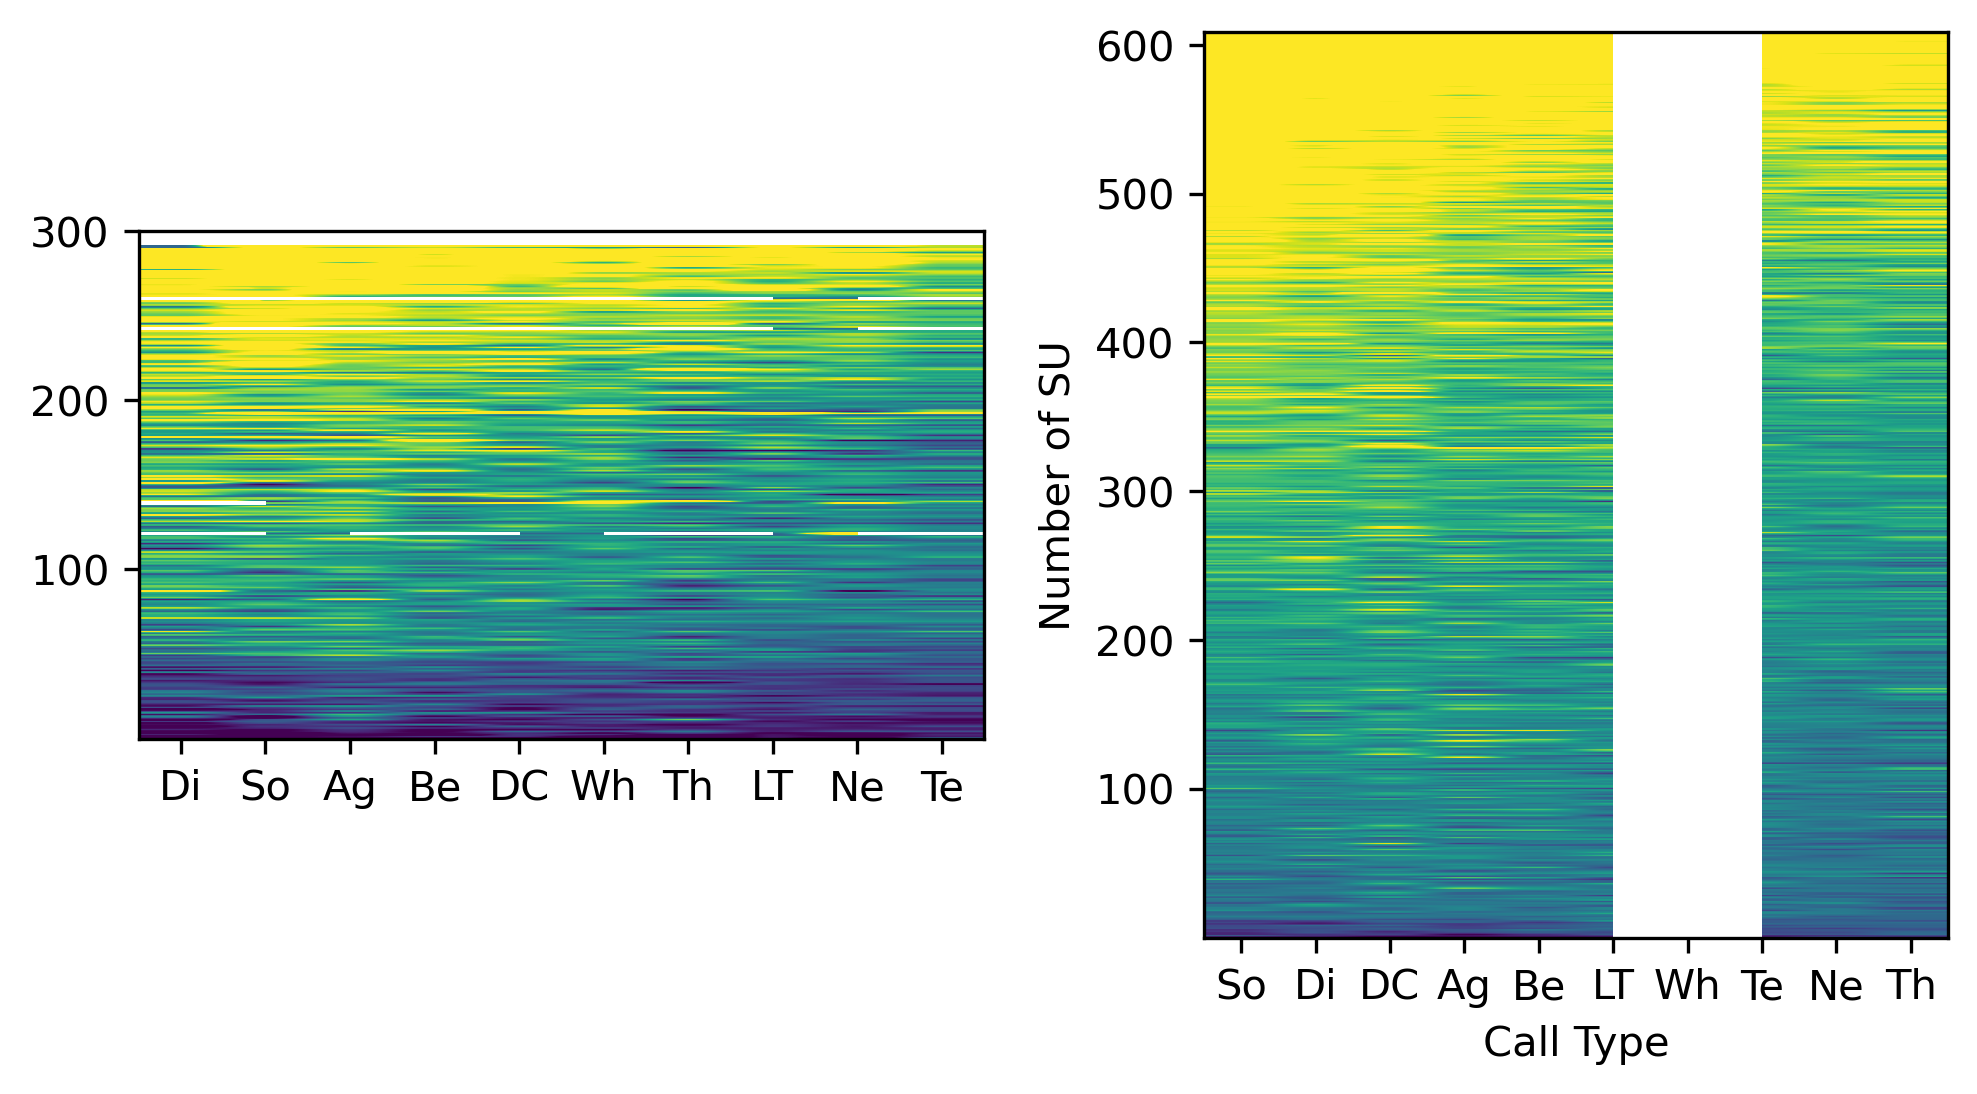

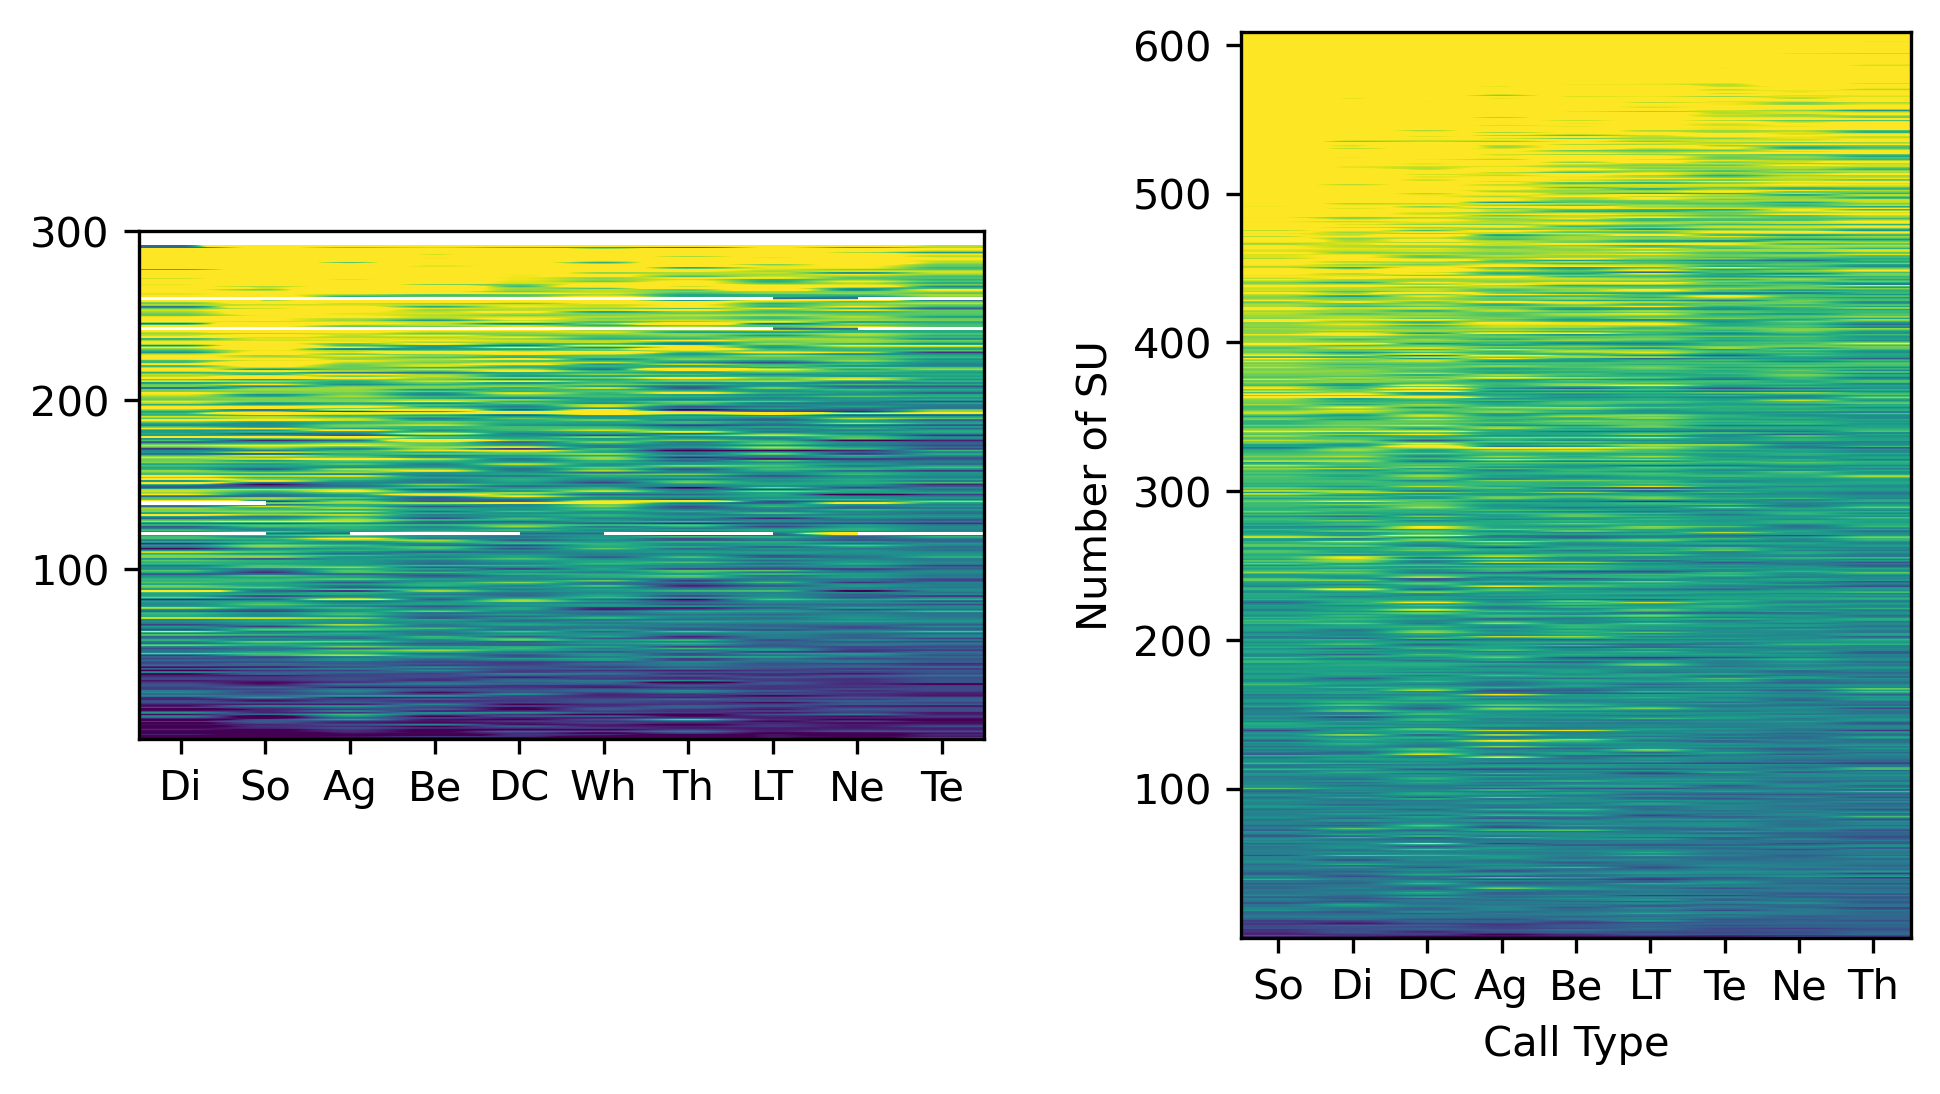

In [10]:
fig = plt.figure(figsize=(8,4), dpi=300)
ax = fig.subplots(1,2)

im = ax[0].imshow(zAllMatrixH[:,callTypeIndH], vmin=-0.5, vmax = 1.0, origin  = 'lower', extent = (-500, len(CallAxis)*1000-500, -10, 20*nAudSUH-10))
ax[0].set_xticks(np.arange(len(CallAxis))*1000)
ax[0].set_xticklabels(np.array(CallAxis)[callTypeIndH])
ax[0].set_yticks(np.arange(3)*2000 + 2000)
ax[0].set_yticklabels(np.arange(3)*100 + 100)
plt.xlabel('Call Type')
plt.ylabel('Number of SU')


im = ax[1].imshow(zAllMatrixJ[:,callTypeIndJ], vmin=-0.5, vmax = 1.0, origin  = 'lower', extent = (-500, len(CallAxis)*1000-500, -10, 20*nAudSUJ-10))
ax[1].set_xticks(np.arange(len(CallAxis))*1000)
ax[1].set_xticklabels(np.array(CallAxis)[callTypeIndJ])
ax[1].set_yticks(np.arange(6)*2000 + 2000)
ax[1].set_yticklabels(np.arange(6)*100 + 100)
# plt.xlabel('Call Type')
# plt.ylabel('Number of SU')

plt.savefig('/Users/frederictheunissen/Desktop/zScoreAvg_zScoreSorted_Mat.eps')

fig = plt.figure(figsize=(8,4), dpi=300)
# Repeat without Whine for Anesthetized
ax = fig.subplots(1,2)

im = ax[0].imshow(zAllMatrixH[:,callTypeIndH], vmin=-0.5, vmax = 1.0, origin  = 'lower', extent = (-500, (len(CallAxis))*1000-500, -10, 20*nAudSUH-10))
ax[0].set_xticks(np.arange(len(CallAxis))*1000)
ax[0].set_xticklabels(np.array(CallAxis)[callTypeIndH])
ax[0].set_yticks(np.arange(3)*2000 + 2000)
ax[0].set_yticklabels(np.arange(3)*100 + 100)
plt.xlabel('Call Type')
plt.ylabel('Number of SU')


im = ax[1].imshow(zAllMatrixJ[:,callTypeIndJ2], vmin=-0.5, vmax = 1.0, origin  = 'lower', extent = (-500, (len(CallAxis)-1)*1000-500, -10, 20*nAudSUJ-10))
ax[1].set_xticks(np.arange(len(CallAxis)-1)*1000)
ax[1].set_xticklabels(np.array(CallAxis)[callTypeIndJ2])
ax[1].set_yticks(np.arange(6)*2000 + 2000)
ax[1].set_yticklabels(np.arange(6)*100 + 100)
# plt.xlabel('Call Type')
# plt.ylabel('Number of SU')

plt.savefig('/Users/frederictheunissen/Desktop/zScoreAvg_zScoreSorted_Mat_NoWh.eps')


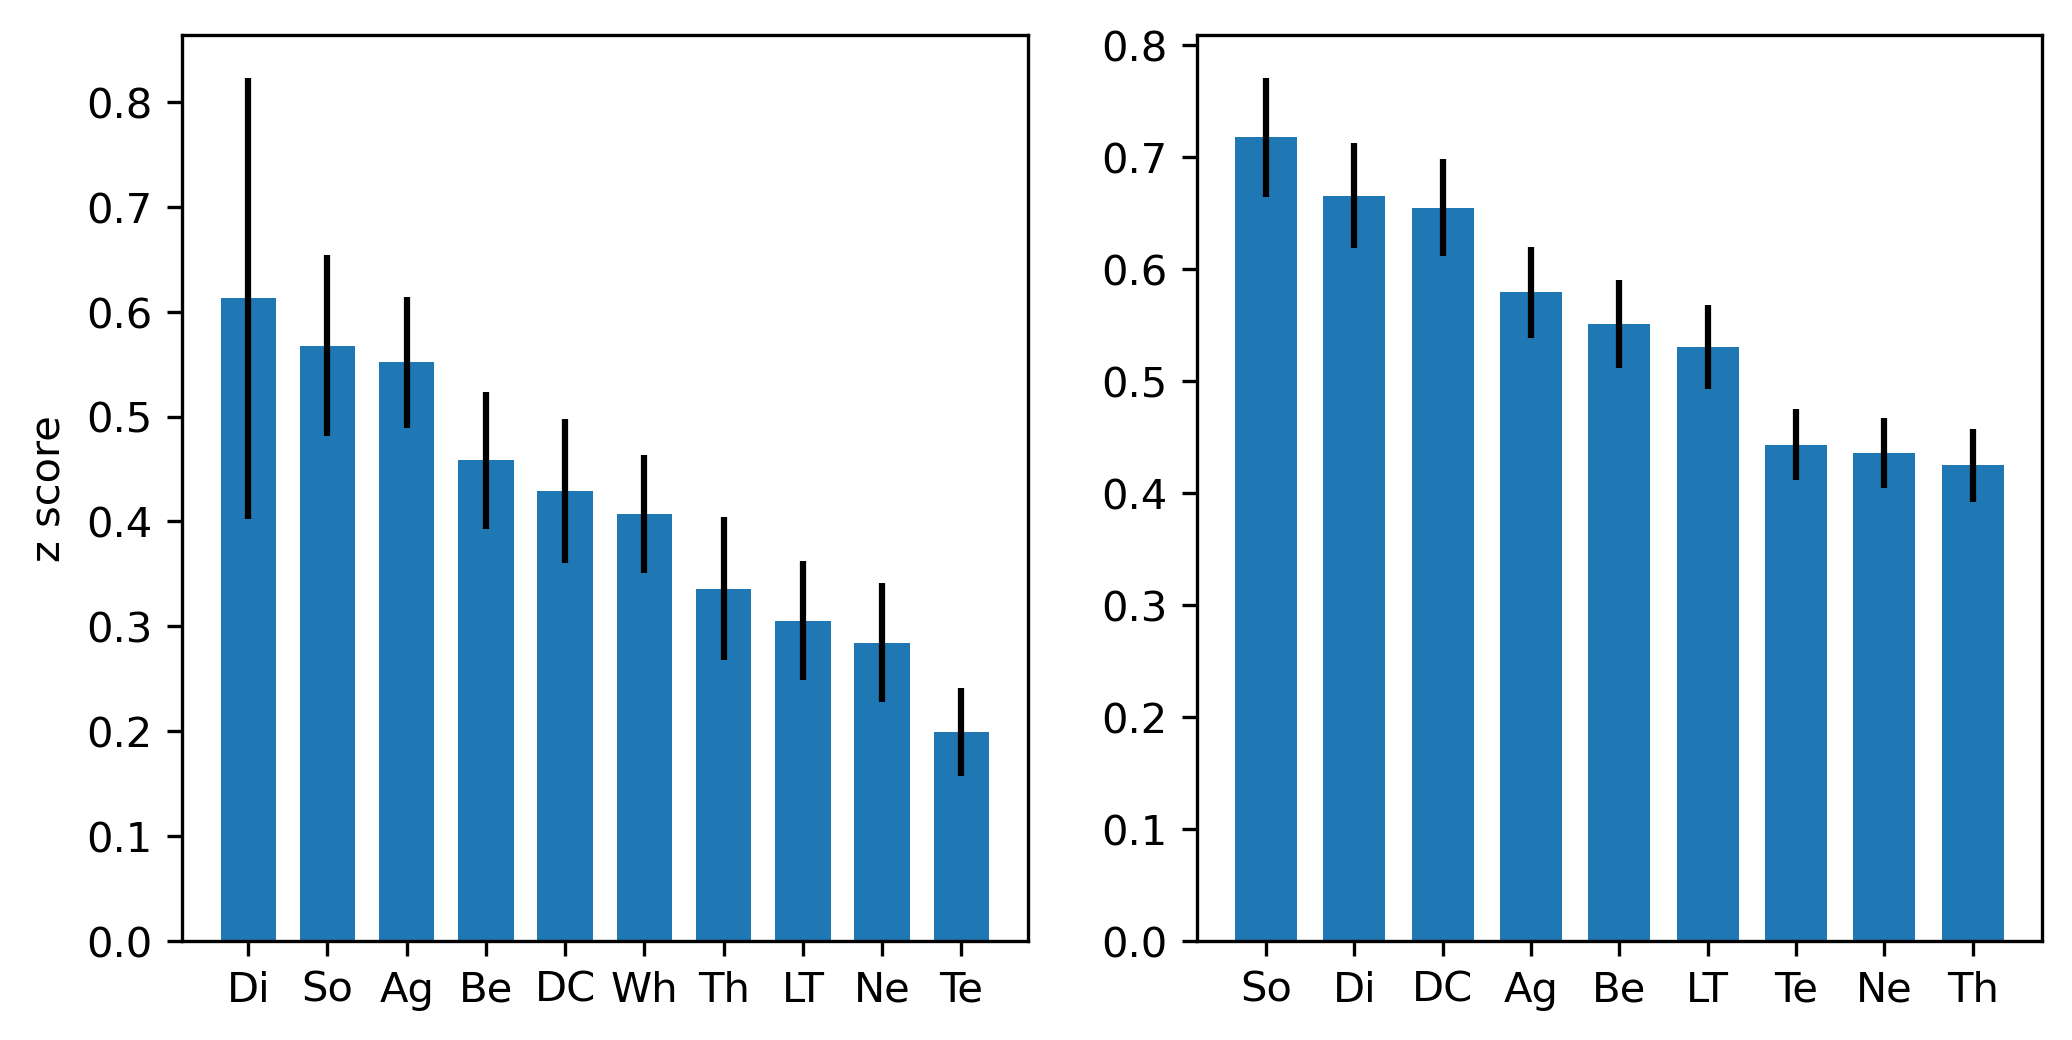

In [11]:
fig = plt.figure(figsize=(8,4), dpi=300)
ax = fig.subplots(1,2)

x = np.arange(len(CallAxis))
width = 0.7

countH = np.count_nonzero(~np.isnan(zAllMatrixH[:,callTypeIndH]),0)
ax[0].bar(x, np.nanmean(zAllMatrixH[:,callTypeIndH], 0), width, yerr = 2.0*np.nanstd(zAllMatrixH[:,callTypeIndH], 0)/np.sqrt(countH))
ax[0].set_ylabel('z score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(np.array(CallAxis)[callTypeIndH])

x = np.arange(len(CallAxis)-1)
width = 0.7
countJ = np.count_nonzero(~np.isnan(zAllMatrixJ[:,callTypeIndJ2]),0)
ax[1].bar(x, np.nanmean(zAllMatrixJ[:,callTypeIndJ2], 0), width, yerr = 2.0*np.nanstd(zAllMatrixJ[:,callTypeIndJ2], 0)/np.sqrt(countJ))
ax[1].set_xticks(x)
ax[1].set_xticklabels(np.array(CallAxis)[callTypeIndJ2])

plt.savefig('/Users/frederictheunissen/Desktop/zScoreAvg_zScoreSorted_Bar.eps')






In [12]:
# Generate matrices sorted by preference found in awake data.

zAllMatrixSortedH = np.full((nAudSUH,len(callTypeIndH)), np.nan)
countMaxZscoreH = np.zeros(len(callTypeIndH))
matrixIndex = np.zeros(nAudSUH)

iCell = 0
for ci in callTypeIndH:
    for index, row in dfSummaryH.sort_values('zAud').iterrows():    
        # Responses across calls for auditory units
        if ( (row['pAud']<0.01) & (row['snr'] >= 5.0) ):        
            # Fill a temp vector
            tempValues = np.full((1,len(callTypeIndH)), np.nan)
            for key, value in zip(row['calls'], row['zcall']) :
                if CallAxis.index(key) in callTypeIndH:
                    tempValues[0,callTypeIndH == CallAxis.index(key)] = value
            
            # Test to see if max is current desired value - need to set small values to nan because argmax decides nan is maximum
            tempValues2 = np.copy(tempValues)
            tempValues2[np.isnan(tempValues2)] = -999
            if callTypeIndH[np.argmax(tempValues2)] == ci:
                countMaxZscoreH[np.argmax(tempValues2)] += 1
                zAllMatrixSortedH[iCell,:] = tempValues
                matrixIndex[iCell] = index
                iCell += 1
        


zAllMatrixSortedJ = np.full((nAudSUJ,len(callTypeIndJ2)), np.nan)
countMaxZscoreJ = np.zeros(len(callTypeIndJ2))

iCell = 0
for ci in callTypeIndJ2:
    for index, row in dfSummaryJ.sort_values('zAud').iterrows():    
        # Responses across calls for auditory units
        if ( (row['pAud']<0.01) & (row['snr'] >= 5.0) ):        
            # Fill a temp vector
            tempValues = np.full((1,len(callTypeIndJ2)), np.nan)
            for key, value in zip(row['calls'], row['zcall']) :
                if CallAxis.index(key) in callTypeIndJ2:
                    tempValues[0, callTypeIndJ2 == CallAxis.index(key)] = value
            
            # Test to see if max is current desired value - need to set small values to nan because argmax decides nan is maximum
            tempValues2 = np.copy(tempValues)
            tempValues2[np.isnan(tempValues2)] = -999
            # Test to see if max is current desired value
            if callTypeIndJ2[np.argmax(tempValues2)] == ci:
                countMaxZscoreJ[np.argmax(tempValues2)] += 1
                zAllMatrixSortedJ[iCell,:] = tempValues
                iCell += 1
        

In [13]:
dfSummary_nc9 = dfSummaryH[~np.isnan(dfSummaryH.selInd)]
selNames = ["Low", "Medium", "High"]
inds = {
    "Low": 231,
    "Medium": 206,
    "High": 179
}

matInd = {}
for sname in selNames:
#    indexinH = dfSummary_nc9.sort_values('selInd').index[inds[sname]]
    indexinH = inds[sname]
    matInd[sname] = np.argwhere(matrixIndex == indexinH)[0]
    print(sname, indexinH, dfSummaryH.loc[indexinH]['site'], matInd[sname])

Low 231 ZF6M_8t_190725_105432 [159]
Medium 206 ZF6M_7_5t_190723_141539 [62]
High 179 ZF6M_7_5t_190723_100723 [128]


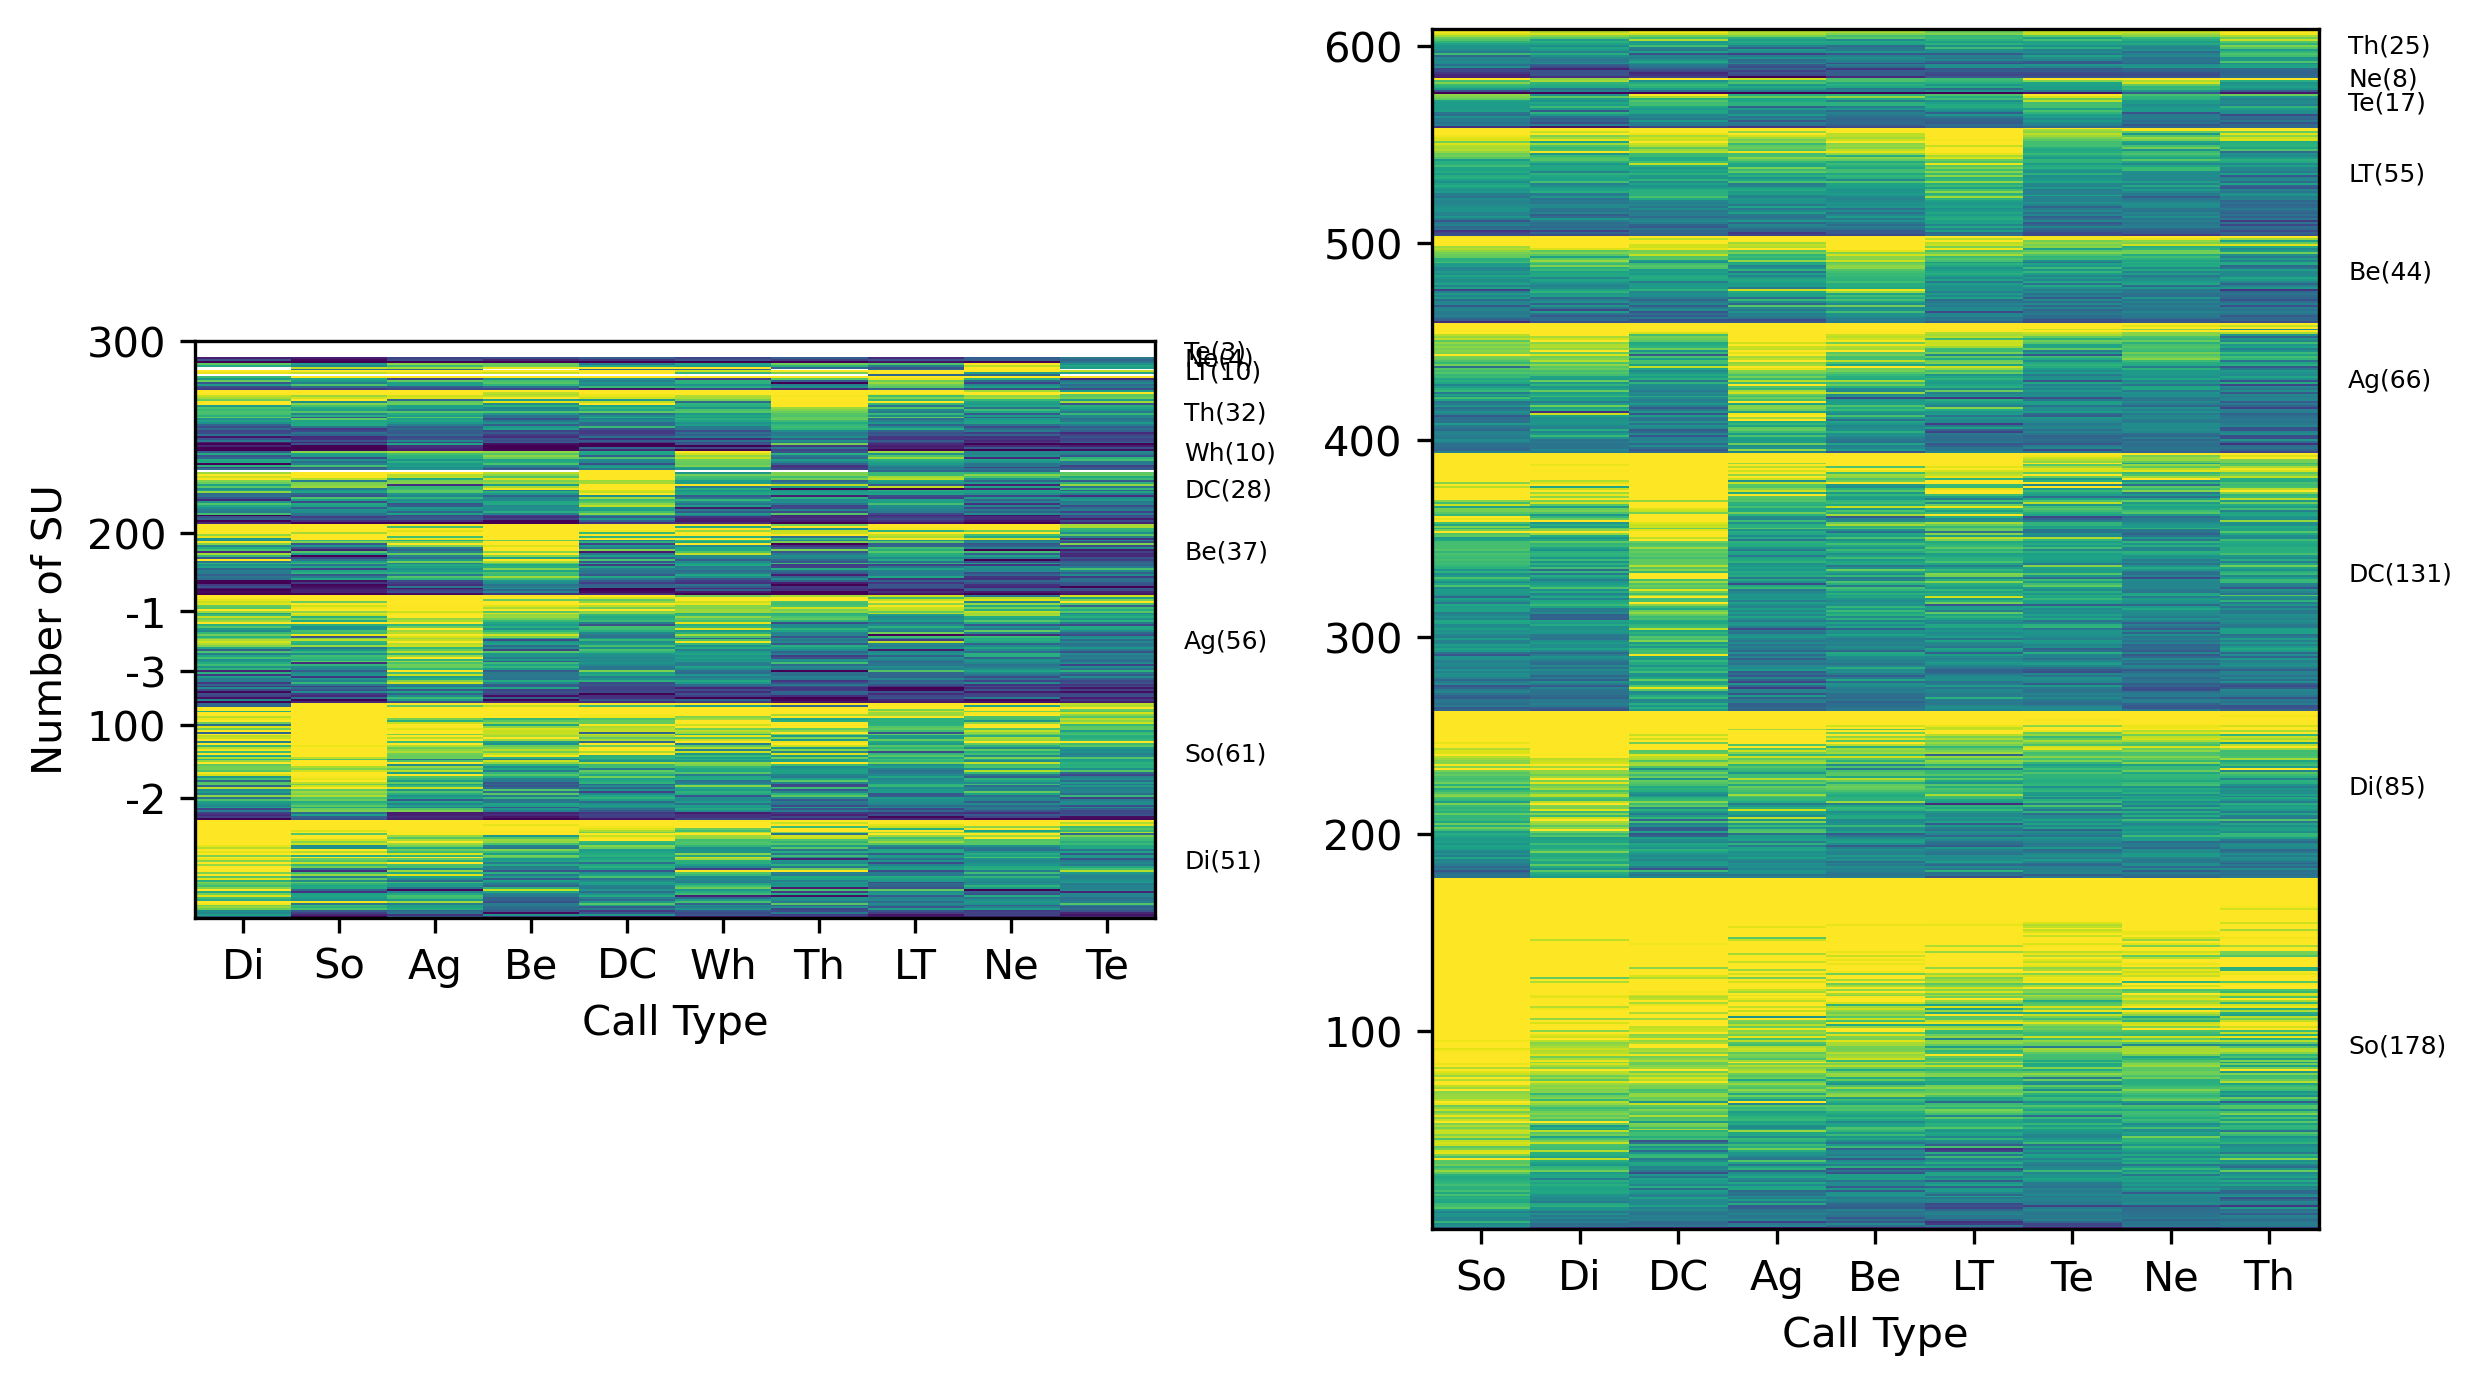

In [14]:
fig = plt.figure(figsize = (8,4), dpi = 300)

ax0 = fig.add_axes((0,0,0.4,1))
im = ax0.imshow(zAllMatrixSortedH, vmin=-0.5, vmax = 1.0, origin  = 'lower', 
                extent = (-500, len(callTypeIndH)*1000-500, -10, 20*nAudSUH-10), interpolation = 'None')
ax0.set_xticks(np.arange(len(callTypeIndH))*1000)
ax0.set_xticklabels(np.array(CallAxis)[callTypeIndH])
ax0.set_yticks(np.hstack((np.arange(3)*2000 + 2000, matInd['Low']*20, matInd['Medium']*20, matInd['High']*20)))
ax0.set_yticklabels(np.hstack((np.arange(3)*100 + 100, -1, -2, -3)))
ax0.set_xlabel('Call Type')
ax0.set_ylabel('Number of SU')
ypos = 0
xpos = (len(callTypeIndH))*1000 - 200
for i in range(len(callTypeIndH)):
    ypos += countMaxZscoreH[i]*20/2
    ax0.text(xpos, ypos, '%s(%d)' % (CallAxis[callTypeIndH[i]], countMaxZscoreH[i]), fontsize = 6 ) 
    ypos += countMaxZscoreH[i]*20/2

ax1 = fig.add_axes((0.5,0,0.4,1))
im = ax1.imshow(zAllMatrixSortedJ, vmin=-0.5, vmax = 1.0, origin  = 'lower', 
                extent = (-500, len(callTypeIndJ2)*1000-500, -10, 20*nAudSUJ-10), interpolation = 'None')
ax1.set_xticks(np.arange(len(callTypeIndJ2))*1000)
ax1.set_xticklabels(np.array(CallAxis)[callTypeIndJ2])
ax1.set_yticks(np.arange(6)*2000 + 2000)
ax1.set_yticklabels(np.arange(6)*100 + 100)
ax1.set_xlabel('Call Type')
# plt.ylabel('Number of SU')
ypos = 0
xpos = (len(callTypeIndJ2))*1000 -200
for i in range(len(callTypeIndJ2)):
    ypos += countMaxZscoreJ[i]*20/2
    ax1.text(xpos, ypos, '%s(%d)'% (CallAxis[callTypeIndJ2[i]], countMaxZscoreJ[i]), fontsize = 6 )
    ypos += countMaxZscoreJ[i]*20/2

plt.savefig('/Users/frederictheunissen/Desktop/zScoreAvg_zScoreSorted_MaxCallSorted_Mat.eps')

In [21]:
# Generate a new matrix of responses sorted by Selectivity Index.
CallAxis = ['Te', 'DC', 'So', 'Ne', 'Wh', 'Ag', 'Di', 'Th', 'Be', 'LT']

zAllMatrixH = np.full((nAudSUH,len(CallAxis)), np.nan)

iCell = 0
for index, row in dfSummaryH.sort_values('selInd').iterrows():    
    # Responses across calls for auditory units
    if ( (row['pAud']<0.01) & (row['snr'] >= 5.0) ):
        # Fill in one row in the matrix
        for key, value in zip(row['calls'], row['zcall']) : 
            zAllMatrixH[iCell,CallAxis.index(key)] = value
        iCell += 1
        
zAllMatrixJ = np.full((nAudSUJ,len(CallAxis)), np.nan)

iCell = 0
for index, row in dfSummaryJ.sort_values('selInd').iterrows():    
    # Responses across calls for auditory units
    if ( (row['pAud']<0.01) & (row['snr'] >= 5.0) ):
        # Fill in one row in the matrix
        for key, value in zip(row['calls'], row['zcall']) : 
            zAllMatrixJ[iCell,CallAxis.index(key)] = value
        iCell += 1
        



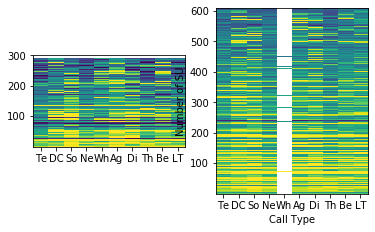

In [22]:
fig, ax = plt.subplots(1,2)

im = ax[0].imshow(zAllMatrixH, vmin=-0.5, vmax = 1.0, origin  = 'lower', extent = (-500, len(CallAxis)*1000-500, -10, 20*nAudSUH-10))
ax[0].set_xticks(np.arange(len(CallAxis))*1000)
ax[0].set_xticklabels(CallAxis)
ax[0].set_yticks(np.arange(3)*2000 + 2000)
ax[0].set_yticklabels(np.arange(3)*100 + 100)
plt.xlabel('Call Type')
plt.ylabel('Number of SU')


im = ax[1].imshow(zAllMatrixJ, vmin=-0.5, vmax = 1.0, origin  = 'lower', extent = (-500, len(CallAxis)*1000-500, -10, 20*nAudSUJ-10))
ax[1].set_xticks(np.arange(len(CallAxis))*1000)
ax[1].set_xticklabels(CallAxis)
ax[1].set_yticks(np.arange(6)*2000 + 2000)
ax[1].set_yticklabels(np.arange(6)*100 + 100)
# plt.xlabel('Call Type')
# plt.ylabel('Number of SU')

plt.savefig('/Users/frederictheunissen/Desktop/zScoreAvg_SelectivitySorted_Mat.png')